In [36]:
#!/usr/bin/env python
import rosbag
import tf
import tf.transformations as tft
import matplotlib.pyplot as plt
from argparse import ArgumentParser
import numpy as np
from geometry_msgs.msg import Point 
import rospy
from scipy.interpolate import interp1d

In [26]:
t_ref = []
x_ref = []
y_ref = [] 
bagfile = "exp1.bag"
target_name = "target"

bag=rosbag.Bag(bagfile)
for topic,msg,t in bag.read_messages(topics=['/gazebo/model_states']):
    target_idx=np.where(np.array(msg.name)==target_name)[0][0]
    target_pos=msg.pose[target_idx]
    x_ref.append(target_pos.position.x)
    y_ref.append(target_pos.position.y)
    t_ref.append(t.secs + t.nsecs * 1e-9)


In [38]:
t_init = t_ref[0]
t_dur = t_ref[-1] - t_ref[0]
t_dur

31.249000000000024

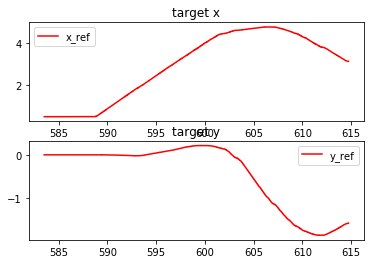

In [31]:
plt.subplot(211)
plt.plot(t_ref,x_ref,'r',label='x_ref')
plt.title('target x')
plt.legend()
plt.subplot(212)
plt.plot(t_ref,y_ref,'r',label='y_ref')
plt.title('target y')
plt.legend()
plt.show()



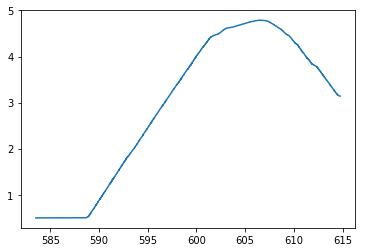

In [42]:
plt.subplot
fx = interp1d (t_ref,x_ref)
fy = interp1d (t_ref,y_ref)

t_new = np.linspace(0,t_dur,num=60000) + t_init
plt.plot(t_new, fx(t_new))





31249

In [35]:

ref_traj_topic_name=rospy.get_param('~ref_traj_topic_name','/pioneer_controller/target_goal')
ref_pub = rospy.Publisher(ref_traj_topic_name,1)

now = rospy.get_rostime()
t_eval=now.secs+now.nsecs*1e-9





error: [Errno 111] Connection refused